# Average radial distribution functions

Here we calculate the average radial cumulative distribution functions between two groups of atoms.

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis [[1, 2]](#References)
* MDAnalysisTests


In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. [[3]](#References)

In [2]:
u = mda.Universe(TPR, XTC)

## Calculating the average radial distribution function for two groups of atoms

A radial distribution function $g_{ab}(r)$ describes the time-averaged density of particles in $b$ from the reference group $a$ at distance $r$. It is normalised so that it becomes 1 for large separations in a homogenous system.

$$ g_{ab}(r) = (N_{a} N_{b})^{-1} \sum_{i=1}^{N_a} \sum_{j=1}^{N_b} \langle \delta(|\mathbf{r}_i - \mathbf{r}_j| - r) \rangle$$

The radial cumulative distribution function is 

$$G_{ab}(r) = \int_0^r \!\!dr' 4\pi r'^2 g_{ab}(r')$$.

The average number of $b$ particles within radius $r$ at density $\rho$ is:

$$N_{ab}(r) = \rho G_{ab}(r)$$

The average number fo particles can be used to compute coordination numbers, such as the number of neighbours in the first solvation shell.

Below, I calculate the average RDF between each atom of residue 60 to each atom of water to look at the distribution of water over the trajectory.

In [3]:
res60 = u.select_atoms('resid 60')
water = u.select_atoms('resname SOL')

irdf = rdf.InterRDF(res60, water,
                    nbins=75,  # default
                    range=(0.0, 15.0),  # distance
                   )
irdf.run()

The distance bins are available at `irdf.bins` and the radial cumulative distribution function is at `irdf.rdf`. 

In [4]:
irdf.bins

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9])

Text(0, 0.5, 'Radial cumulative distribution')

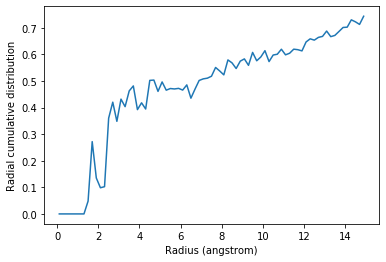

In [5]:
plt.plot(irdf.bins, irdf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')

The total number of atom pairs in each distance bin over the trajectory, before it gets normalised over the density, number of frames, and volume of each radial shell, is at `irdf.count`.

In [14]:
irdf.count

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 4.000e+00, 2.900e+01, 1.800e+01, 1.600e+01, 2.000e+01,
       8.300e+01, 1.130e+02, 1.080e+02, 1.530e+02, 1.620e+02, 2.090e+02,
       2.430e+02, 2.200e+02, 2.590e+02, 2.690e+02, 3.750e+02, 4.100e+02,
       4.080e+02, 4.760e+02, 4.820e+02, 5.260e+02, 5.630e+02, 6.060e+02,
       6.390e+02, 7.100e+02, 6.780e+02, 7.770e+02, 8.810e+02, 9.440e+02,
       1.003e+03, 1.074e+03, 1.204e+03, 1.237e+03, 1.265e+03, 1.471e+03,
       1.513e+03, 1.526e+03, 1.678e+03, 1.780e+03, 1.782e+03, 2.021e+03,
       1.998e+03, 2.133e+03, 2.309e+03, 2.241e+03, 2.429e+03, 2.535e+03,
       2.713e+03, 2.718e+03, 2.845e+03, 3.021e+03, 3.117e+03, 3.201e+03,
       3.491e+03, 3.673e+03, 3.765e+03, 3.948e+03, 4.096e+03, 4.351e+03,
       4.348e+03, 4.511e+03, 4.748e+03, 4.995e+03, 5.148e+03, 5.503e+03,
       5.600e+03, 5.678e+03, 6.085e+03])

## Calculating the average radial distribution function for a group of atoms to itself

You may want to calculate the average RDF for a group of atoms where atoms overlap; for instance, looking at residue 60 around itself. In this case you should avoid including contributions from atoms interacting with themselves. The `exclusion_block` keyword allows you to mask pairs within the same chunk of atoms. Here you can pass `exclusion_block=(1, 1)` to create chunks of size 1 and avoid computing the RDF to itself.

In [6]:
irdf2 = rdf.InterRDF(res60, res60,
                     exclusion_block=(1, 1))
irdf2.run()

Text(0, 0.5, 'Radial cumulative distribution')

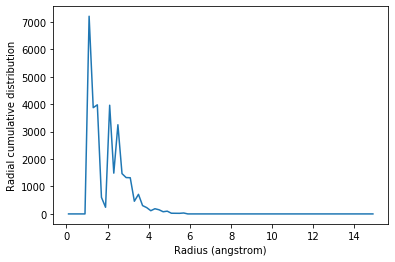

In [7]:
plt.plot(irdf2.bins, irdf2.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')

Similarly, you can apply this to residues. 

In [8]:
thr = u.select_atoms('resname THR')
print('There are {} THR residues'.format(len(thr.residues)))
print('THR has {} atoms'.format(len(thr.residues[0].atoms)))

There are 11 THR residues
THR has 14 atoms


The code below calculates the RDF only using contributions from pairs of atoms where the two atoms are *not* in the same threonine residue.

In [9]:
irdf3 = rdf.InterRDF(thr, thr,
                     exclusion_block=(14, 14))
irdf3.run()

Text(0, 0.5, 'Radial cumulative distribution')

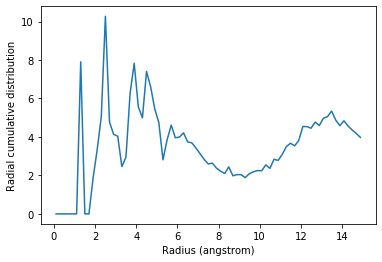

In [10]:
plt.plot(irdf3.bins, irdf3.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')

If you are splitting a residue over your two selections, you can discount pairs from the same residue by choosing appropriately sized exclusion blocks.

In [11]:
first = thr.residues[0]
print('THR has these atoms: ', ', '.join(first.atoms.names))
thr_c1 = first.atoms.select_atoms('name C*')
print('THR has {} carbons'.format(len(thr_c1)))
thr_other1 = first.atoms.select_atoms('not name C*')
print('THR has {} non carbons'.format(len(thr_other1)))

THR has these atoms:  N, H, CA, HA, CB, HB, OG1, HG1, CG2, HG21, HG22, HG23, C, O
THR has 4 carbons
THR has 10 non carbons


The `exclusion_block` here ensures that the RDF is only computed from threonine carbons to atoms in different threonine residues.

In [12]:
thr_c = thr.select_atoms('name C*')
thr_other = thr.select_atoms('not name C*')

irdf4 = rdf.InterRDF(thr_c, thr_other,
                     exclusion_block=(4, 10))
irdf4.run()

Text(0, 0.5, 'Radial cumulative distribution')

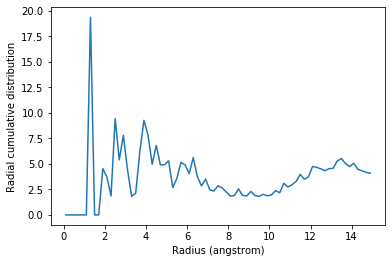

In [13]:
plt.plot(irdf4.bins, irdf4.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')

## References

[1] R. J. Gowers, M. Linke, J. Barnoud, T. J. E. Reddy, M. N. Melo, S. L. Seyler, D. L. Dotson, J. Domanski, S. Buchoux, I. M. Kenney, and O. Beckstein. [MDAnalysis: A Python package for the rapid analysis of molecular dynamics simulations](http://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html). In S. Benthall and S. Rostrup, editors, *Proceedings of the 15th Python in Science Conference*, pages 98-105, Austin, TX, 2016. SciPy, doi: [10.25080/majora-629e541a-00e](https://doi.org/10.25080/majora-629e541a-00e).

[2] N. Michaud-Agrawal, E. J. Denning, T. B. Woolf, and O. Beckstein. MDAnalysis: A Toolkit for the Analysis of Molecular Dynamics Simulations. *J. Comput. Chem*. 32 (2011), 2319-2327, [doi:10.1002/jcc.21787](https://dx.doi.org/10.1002/jcc.21787). PMCID:[PMC3144279](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144279/)

[3] Beckstein O, Denning EJ, Perilla JR, Woolf TB. Zipping and unzipping of adenylate kinase: atomistic insights into the ensemble of open<-->closed transitions. *J Mol Biol*. 2009;394(1):160–176. [doi:10.1016/j.jmb.2009.09.009](https://dx.doi.org/10.1016%2Fj.jmb.2009.09.009)

